# EDA 1번

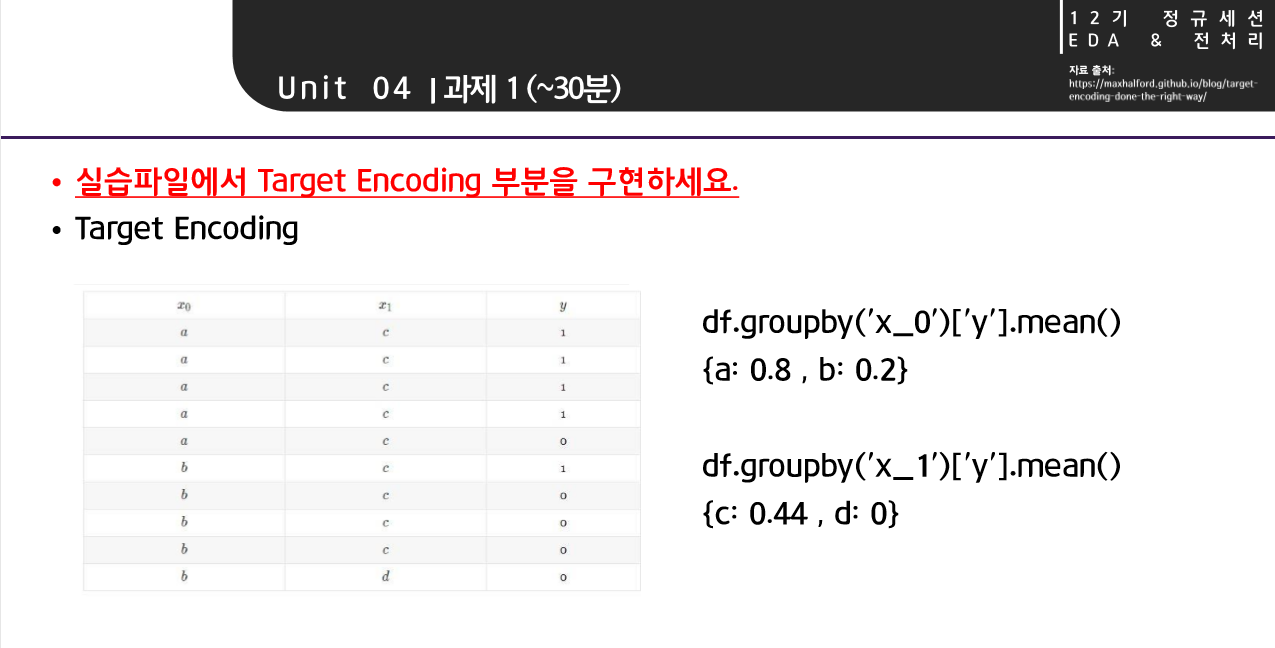

### 개요
과제 1번은 feature encoding이었다. 주로 범주형 변수를 어떻게 처리할지 고민해 보는 시간이었다.


#### 데이터 출처
캐글 타이타닉 데이터 (https://www.kaggle.com/c/titanic)

In [27]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

plt.style.use('seaborn')
warnings.filterwarnings('ignore')
%matplotlib inline

In [35]:
data = pd.read_csv('../data/titanic/train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


 * initial feature에  5가지 성으로 구분
 * target encoding이 목적

In [29]:
data.columns.values

array(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'], dtype=object)

## 이름 바꾸기

In [30]:
for i in data:
    data['Initial']=data['Name'].str.extract('([A-Za-z]+)\.')
data['Initial'].replace(['Mlle','Mme','Ms','Dr','Major','Lady','Countess','Jonkheer','Col','Rev','Capt','Sir','Don'],['Miss','Miss','Miss','Mr','Mr','Mrs','Mrs','Other','Other','Other','Other','Other','Other'],inplace=True)
data['Initial'].unique()

array(['Mr', 'Mrs', 'Miss', 'Master', 'Other'], dtype=object)

데이터를 로드하자마자 'Initial'부터 처리했다.\
replace 왼쪽 인자 리스트는 오른쪽의 흔히 쓰는 성들로 바꿀 수 있다.\
각각 1대1로 매칭해서 바꿔주고 unique()로 안바뀐 것이 있는지 확인했다.

In [31]:
val = data.groupby('Initial')['Survived'].mean()
val

Initial
Master    0.575000
Miss      0.704301
Mr        0.161597
Mrs       0.795276
Other     0.166667
Name: Survived, dtype: float64

성별에 따라서 어느 비율로 생존했는지 확인할 수 있다.

In [32]:
data['Initial_encoded'] = 0 
dic = val.to_dict()
dic


{'Master': 0.575,
 'Miss': 0.7043010752688172,
 'Mr': 0.16159695817490494,
 'Mrs': 0.7952755905511811,
 'Other': 0.16666666666666666}

이름 feature를 성별에 따른 생존율 feature로 바꿔주려 한다.

In [33]:
data['Initial'] = data['Initial'].replace(dic)
data['Initial']

0      0.161597
1      0.795276
2      0.704301
3      0.795276
4      0.161597
         ...   
886    0.166667
887    0.704301
888    0.704301
889    0.161597
890    0.161597
Name: Initial, Length: 891, dtype: float64

In [34]:
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Initial,Initial_encoded
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,0.161597,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,0.795276,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,0.704301,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,0.795276,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,0.161597,0
